In [4]:
import sys
import pandas as pd
from importlib import reload
import numpy as np
sys.path += ["../src"]
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots as sbp
from glob import glob
import warnings
from IPython.display import display, Latex
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter, FormatStrFormatter
warnings.simplefilter(action='ignore', category=FutureWarning)
from itertools import combinations

In [5]:
sns.set_palette([sns.color_palette("colorblind")[k] for k in [-1,4,2,3]])

In [6]:
sns.color_palette()

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

In [7]:
mods = ["leaders","feed","update","rewire"]

In [8]:
convert_to_exp = lambda l: [fr"$10^{u}$" if u >= 0 else fr"$0$" for u in l]

In [12]:
path =  "../data/leaders_exp2/est*"
reps = ["1", "2", "3"]
df =  pd.concat([pd.DataFrame(pd.read_pickle(file)) for file in glob(path)]).sort_values("method", ascending = False).assign(rep = lambda x: [u.split("_")[0] for u in x["id"]]).query("rep in @reps")

In [14]:
df.query("(method == 'sviNF')&(T < 2048)")#.groupby("rep").mean(numeric_only = True)

,id,method,mse_epsilon,accuracy_roles,correct_leaders,correct_followers,est_leaders,tot_time,n_steps,n_samples,...,T,N,edge_per_t,initial_leaders,initial_leaders_ratio,var_X_end,skew_X_end,kurtosis_X_end,bimodality_X_end,rep
0,1_100_5_128,sviNF,0.000094,0.990,1.00,0.987500,21.0,1144.834444,4000,None,...,128,100,10,20,5.0,0.080525,0.155666,-1.099189,0.034644,1
0,1_200_5_128,sviNF,0.000464,0.785,0.20,0.931250,19.0,4546.672327,4000,None,...,128,200,10,40,5.0,0.092087,0.071290,-1.199186,0.029442,1
0,1_200_25_128,sviNF,0.008348,0.895,0.00,0.932292,13.0,4559.237274,4000,None,...,128,200,10,8,25.0,0.093453,0.116637,-1.198801,0.031004,1
0,1_50_25_512,sviNF,0.002619,0.900,0.50,0.916667,5.0,368.706691,4000,None,...,512,50,10,2,25.0,0.113856,-0.125558,-1.057038,0.089306,1
0,1_50_50_128,sviNF,0.005076,0.820,0.00,0.836735,8.0,378.128541,4000,None,...,128,50,10,1,50.0,0.089889,0.193366,-0.884355,0.061407,1
0,1_100_100_128,sviNF,0.006688,0.930,0.00,0.939394,6.0,1115.107521,4000,None,...,128,100,10,1,100.0,0.082949,-0.137840,-1.104809,0.031956,1
0,1_50_10_512,sviNF,0.000005,1.000,1.00,1.000000,5.0,337.538464,4000,None,...,512,50,10,5,10.0,0.165627,0.018949,-1.646282,0.122211,1
0,1_100_5_512,sviNF,0.010437,0.990,1.00,0.987500,21.0,1148.815723,4000,None,...,512,100,10,20,5.0,0.075162,0.110310,-1.190894,0.043639,1
0,1_100_50_128,sviNF,0.015579,0.990,1.00,0.989796,3.0,1142.704382,4000,None,...,128,100,10,2,50.0,0.068488,-0.088233,-0.936341,0.044593,1
0,1_50_50_512,sviNF,0.000064,0.980,1.00,0.979592,2.0,372.179278,4000,None,...,512,50,10,1,50.0,0.143815,0.628460,-1.099620,0.099310,1


In [27]:
df.groupby(["N", "T", "initial_leaders_ratio"]).count()["id"].unstack()

initial_leaders_ratio  5.0    10.0   25.0   50.0   100.0
N   T                                                   
50  128                 12.0   12.0   12.0   12.0    NaN
    512                 12.0   12.0   12.0   12.0    NaN
    2048                12.0   11.0   12.0   12.0    NaN
    8192                 6.0    6.0    6.0    6.0    NaN
100 128                 12.0   12.0   11.0   12.0   12.0
    512                 12.0   12.0   12.0   12.0   12.0
    2048                12.0   12.0   12.0   12.0   12.0
    8192                 6.0    6.0    6.0    6.0    6.0
200 128                  8.0    9.0    9.0    9.0    9.0
    512                  9.0   10.0    9.0    9.0   11.0
    2048                12.0   12.0    9.0   12.0    9.0
    8192                 6.0    6.0    5.0    5.0    5.0
400 128                  6.0    6.0    7.0    7.0    8.0
    512                  6.0    6.0    6.0    8.0    8.0
    2048                 6.0    6.0    7.0    8.0    9.0
    8192                 3.0    3.0    3.0    3.0    3.0

In [36]:
full_id = list(df["id"].value_counts().reset_index().query("count == 4")["id"])
ids_methods = {method: list(df.query("method == @method")["id"]) for method in methods}

print("Total number of combinations", len(df.query("(method == 'svinormal')&(rep == '1')")))
print("Total number of experiments", len(df.query("(method == 'svinormal')&(rep == '1')")) * 3 * 4)
print("Total number of completed experiments", len(df))
print("Experiments completed with all the methods", len(full_id))

Total number of combinations 76
Total number of experiments 912
Total number of completed experiments 668
Experiments completed with all the methods 91


In [32]:
epsilons = ["epsilon_F_plus", "epsilon_L_plus", "epsilon_F_minus", "epsilon_L_minus"]
methods = ["svinormal", "sviNF", "mcmc", "abc"]
methods_names = ["SVI - Normal", "SVI - NF", "MCMC", "ABC"]
patches_methods = [mpatches.Patch(color = sns.color_palette()[j], label = method) for j,method in enumerate(methods_names)]
y_vars = ["accuracy_roles", "rmse_epsilon"]
signs = ["plus", "minus"]
roles = ["F", "L"]

df["n_iter"] = df.fillna(0)["n_steps"] + df.fillna(0)["n_samples"]
df["rmse_epsilon"] = df["mse_epsilon"] ** (0.5)
df["interaction_per_person"] = df["T"] * df["edge_per_t"] / df["N"]
df["diff_epsilon_plus"] = df["epsilon_F_plus_real"] - df["epsilon_L_plus_real"]
df["diff_epsilon_minus"] = -(df["epsilon_F_minus_real"] - df["epsilon_L_minus_real"])
df["error_roles"] = 1 - df["accuracy_roles"]
df["pos_interactions_F"] = df["pos_interactions_F_plus"] + df["pos_interactions_F_minus"]
df["pos_interactions_L"] = df["pos_interactions_L_plus"] + df["pos_interactions_L_minus"]
df["proportion_leaders"] = 1 / df["initial_leaders_ratio"]

for eps in epsilons:
    df[eps + "_in_bound"] = ((df[eps + "_real"] - 2 * df[eps + "_std"]) < df[eps + "_mean"]) & (df[eps + "_mean"] < (df[eps + "_real"] + 2 * df[eps + "_std"]))


In [33]:
vars = {type_var: [u for u in df.columns if type_var in u] for type_var in ["std", "error", "mean", "real", "X", "interaction"]}

In [34]:
dfs = {method: df.query("method == @method").reset_index().drop("index", axis = 1) for method in methods}

## Paper plots

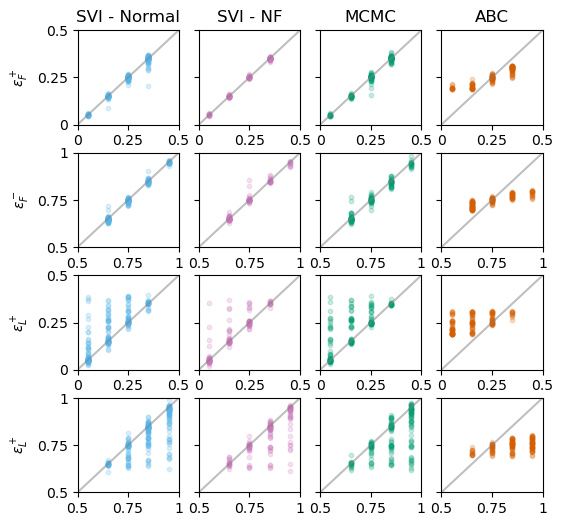

In [37]:
fig, axes = sbp(ncols = 4, nrows = 4, figsize = (6, 6), sharey = "row")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.2, hspace = 0.3)

xs = ["epsilon_F_plus_real", "epsilon_F_minus_real", "epsilon_L_plus_real","epsilon_L_minus_real"]
ys = ["epsilon_F_plus_mean", "epsilon_F_minus_mean", "epsilon_L_plus_mean","epsilon_L_minus_mean"]
ax_lims = [(0,0.5), (0.5,1.)]
ax_ticks = [(0,0.25,0.5), (0.5,0.75,1)]
for i, var_str in enumerate([r"$^+_F$", r"$^-_F$", r"$^+_L$", r"$^+_L$"]):
    for j,method in enumerate(methods):
        axes[i,j].plot(ax_lims[i % 2], ax_lims[i % 2], color = "grey", alpha = 0.5)
        sns.regplot(dfs[method], x = xs[i], y = ys[i], ax = axes[i,j], color = sns.color_palette()[j],fit_reg = False, x_jitter = 0.0, scatter_kws = {"alpha": 0.2, "s": 10})
        axes[i,j].set_xlim(ax_lims[i % 2])
        axes[i,j].set_ylim(ax_lims[i % 2])
            
        axes[0,j].set_title(["SVI - Normal", "SVI - NF", "MCMC", "ABC"][j])
        # axes[i,j].set_xlabel(r"Real $\epsilon$" +  var_str)
        axes[i,j].set_xlabel("")
        axes[i,j].set_ylabel("")
        axes[i,j].set_xticks(ax_ticks[i % 2], [str(u) for u in ax_ticks[i % 2]])
        axes[i,j].set_yticks(ax_ticks[i % 2], [str(u) for u in ax_ticks[i % 2]])
        # axes[i,j].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # axes[i,0].set_ylabel(r"Estimated $\epsilon$" + var_str)
    axes[i,0].set_ylabel(r"$\epsilon$" + var_str)
            
axes[3,0].legend(loc='upper center', bbox_to_anchor=(2.3, -0.3), fancybox=True, ncol=4, handles = patches_methods)
fig.savefig(f"../paper/scatterplot_extended_bottomlegend.pdf", bbox_inches="tight")

axes[3,0].get_legend().remove()
fig.savefig(f"../paper/scatterplot_extended_nolegend.pdf", bbox_inches="tight")
fig.show()


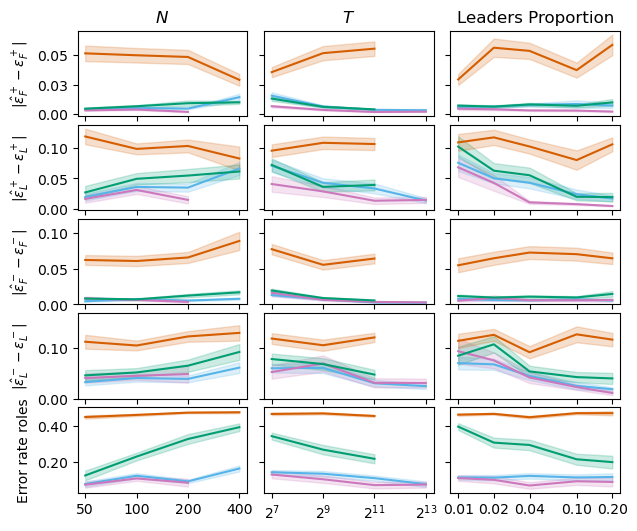

In [38]:
fig, axes = sbp(ncols = 3, nrows = 5, figsize = (7,6), sharey = "row", sharex = "col")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.1, hspace = 0.1)

x_lab_T = [128, 512, 2048, 8192]
x_labT_pow2 =  [r"$2^{7}$", r"$2^{9}$", r"$2^{11}$", r"$2^{13}$"]
x_lab_N=[50, 100, 200, 400]
x_lab_initial_leaders_ratio = [0.01, 0.02, 0.04, 0.1, 0.2]

for i, y_var in enumerate(vars["error"]):
    for j, x_var in enumerate(["N", "T", "proportion_leaders"]):
        # for method in methods:
            # sns.lineplot(data = dfs[method], x = x_var, y = y_var, ax = axes[i,j], errorbar = "se")
        # sns.lineplot(data = df, x = x_var, y = y_var, hue = "method", ax = axes[i,j], errorbar = "se", palette = colors)
        sns.lineplot(data = df, x = x_var, y = y_var, hue = "method", ax = axes[i,j], errorbar = "se")
        axes[0,j].set_title([r"$N$", r"$T$", "Leaders Proportion"][j])
        # axes[i,j].set_yscale("log")
        # axes[i,j].set_xticklabels([])
        axes[i,j].set_xscale("log")

        axes[i,j].tick_params(axis = u'both', which = 'minor', length=0)
        axes[i,j].xaxis.set_minor_locator(plt.NullLocator())
        axes[i,j].set_xlabel("")
        axes[i,j].set_xticks([x_lab_N, x_lab_T, x_lab_initial_leaders_ratio][j], 
                             [x_lab_N, x_labT_pow2, x_lab_initial_leaders_ratio][j])
        if i == 2:
            axes[i,j].set_ylim([0, 0.12])
        if i == 3:
            axes[i,j].set_ylim([0, 0.17])
        axes[i,j].get_legend().remove()
        if j < 4:   
            axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if j == 2:
            axes[i,j].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
    axes[i,0].set_ylabel([r"$| \hat{\epsilon}^+_F - \epsilon^+_F |$", 
                          r"$| \hat{\epsilon}^+_L - \epsilon^+_L |$", r"$| \hat{\epsilon}^-_F - \epsilon^-_F |$",r"$| \hat{\epsilon}^-_L - \epsilon^-_L |$",
                          "Error rate roles"][i])
    axes[i,1].set_ylabel("")
    axes[i,2].set_ylabel("")
        
axes[4,0].legend(loc='upper center', bbox_to_anchor=(1.45, -0.3), fancybox=True, ncol=4, handles = patches_methods, fontsize = 13)
fig.savefig(f"../paper/lineplot_extended_bottomlegend.pdf", bbox_inches="tight")

axes[4,0].get_legend().remove()
axes[0,0].legend(loc='upper center', bbox_to_anchor=(1.45, 1.8), fancybox=True, ncol=4, handles = patches_methods, fontsize = 13)
fig.savefig(f"../paper/lineplot_extended_toplegend.pdf", bbox_inches="tight")

axes[0,0].get_legend().remove()
fig.savefig(f"../paper/lineplot_extended_nolegend.pdf", bbox_inches="tight")
fig.show()

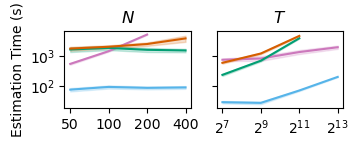

In [39]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (3.6,1), sharey = "row", sharex = "col")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.2, hspace = 0.1)

x_lab_T = [128, 512, 2048, 8192]
x_labT_pow2 =  [r"$2^{7}$", r"$2^{9}$", r"$2^{11}$", r"$2^{13}$"]
x_lab_N=[50, 100, 200, 400]

y_var = "tot_time"
for j, x_var in enumerate(["N", "T"]):
    # for method in methods:
    #     sns.lineplot(data = dfs[method], x = x_var, y = y_var, ax = axes[j], errorbar = "se")
    sns.lineplot(data = df, x = x_var, y = y_var, ax = axes[j], hue = "method", errorbar = "se")
    axes[j].set_title([r"$N$", r"$T$"][j])
    axes[j].set_xscale("log")
    axes[j].set_yscale("log")

    axes[j].tick_params(axis = u'both', which = 'minor', length=0)
    axes[j].xaxis.set_minor_locator(plt.NullLocator())
    axes[j].set_xlabel("")
    axes[j].set_xticks([x_lab_N, x_lab_T, x_lab_initial_leaders_ratio][j], 
                         [x_lab_N, x_labT_pow2, x_lab_initial_leaders_ratio][j])
    axes[j].get_legend().remove()
    
        
axes[0].set_ylabel("Estimation Time (s)")
axes[1].set_ylabel("")

axes[1].legend(loc='upper center', bbox_to_anchor=(1.8, 1.1), fancybox=True, ncol=1, handles = patches_methods, fontsize = 12)
fig.savefig(f"../paper/lineplot_estimation_time_rightlegend.pdf", bbox_inches="tight")

axes[1].get_legend().remove()
axes[0].legend(loc='upper center', bbox_to_anchor=(1, -0.35), fancybox=True, ncol=4, handles = patches_methods, fontsize = 9)
fig.savefig(f"../paper/lineplot_estimation_time_bottomlegend.pdf", bbox_inches="tight")

axes[0].get_legend().remove()
fig.savefig(f"../paper/lineplot_estimation_time_nolegend.pdf", bbox_inches="tight")
fig.show()

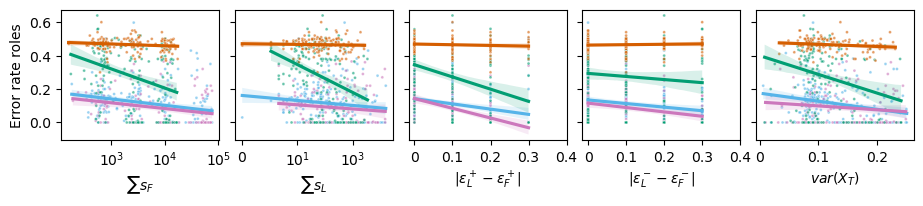

In [40]:
fig, axes = sbp(ncols = 5, nrows = 1, figsize = (11,1.7), sharey = "row", sharex = "col")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.1, hspace = 0.)

x_vars = ['pos_interactions_F', 'pos_interactions_L', 'diff_epsilon_plus',"diff_epsilon_minus", "var_X_end"]
y_var = "rmse_epsilon"
y_var = "error_roles"

x_ticks_exp = [[3,4,5], [-1,1,3], [0,0.1,0.2,0.3,0.4], [0,0.1,0.2,0.3,0.4], [0,0.1,0.2]]
# y_ticks_exp = [-1, -2]
y_lim = [-2.7, -0.5]
for j, x_var in enumerate(x_vars):
    sns.scatterplot(data = df.assign(
            pos_interactions_F = lambda x:np.log10(x["pos_interactions_F"] + 0.1),
            pos_interactions_L = lambda x:np.log10(x["pos_interactions_L"] + 0.1),
            rmse_epsilon = lambda x:np.log10(x["rmse_epsilon"] + 0.)),
            x = x_var, y = y_var, ax = axes[j], marker = ".", size = 0.05, alpha = 0.6, hue = "method")
    for k,method in enumerate(methods):
        sns.regplot(data = df.assign(
            pos_interactions_F = lambda x:np.log10(x["pos_interactions_F"] + 0.1),
            pos_interactions_L = lambda x:np.log10(x["pos_interactions_L"] + 0.1),
            rmse_epsilon = lambda x:np.log10(x["rmse_epsilon"] + 0.)).query("method == @method"),
            x = x_var, y = y_var, ax = axes[j], color = sns.color_palette()[k], scatter_kws = {'s': 0})
    axes[j].set_xticks(x_ticks_exp[j], convert_to_exp(x_ticks_exp[j]) if j < 2 else x_ticks_exp[j])
    # axes[j].set_yticks(y_ticks_exp, [r"$10^{-1}$", r"$10^{-2}$"])
    axes[j].set_ylabel("")
    axes[j].set_xlabel("")
    # axes[j].set_ylim(y_lim)
    axes[j].set_xlabel([r"$\sum s_F$", r"$\sum s_L$", r"$|\epsilon^+_L - \epsilon^+_F|$", r"$|\epsilon^-_L - \epsilon^-_F|$", r"$var(X_T)$"][j])
    axes[0].set_ylabel("Error rate roles")
    # axes[0].set_ylabel(r"$RMSE(\hat{\epsilon}^+_F, \hat{\epsilon}^-_F, \hat{\epsilon}^+_L, \hat{\epsilon}^-_L)$")
    axes[j].get_legend().remove()
    
axes[4].legend(loc='upper center', bbox_to_anchor=(1.7, 1), fancybox=True, ncol=1, handles = patches_methods, fontsize = 13)
fig.savefig(f"../paper/regplot_rmse_rightlegend.pdf", bbox_inches="tight")

axes[4].get_legend().remove()
axes[0].legend(loc='upper center', bbox_to_anchor=(1.9, -0.4), fancybox=True, ncol=4, handles = patches_methods, fontsize = 13)
fig.savefig(f"../paper/regplot_rmse_bottomlegend.pdf", bbox_inches="tight")

axes[0].get_legend().remove()
fig.savefig(f"../paper/regplot_rmse_nolegend.pdf", bbox_inches="tight")
fig.show()

### Quantitative Results

In [41]:
for method in methods:
    print(f"Average RMSE {method} {df.query('(method == @method)')['rmse_epsilon'].mean()}")

print("")

for method in methods:
    print(f"Average RMSE intersection {method} {df.query('(method == @method)&(id in @full_id)')['rmse_epsilon'].mean()}")

print("")
for method in methods:
    print(f"Average error roles {method} {df.query('(method == @method)')['error_roles'].mean()}")

print("")
method = "sviNF"
print(f"Average error roles with filter A {df.query('(method == @method)&(diff_epsilon_plus > 0)&(diff_epsilon_minus > 0)')['error_roles'].mean()}")
print(f"Average error roles with filter B {df.query('(method == @method)&(diff_epsilon_plus > 0)&(diff_epsilon_minus > 0)&(var_X_end > 0.1)')['error_roles'].mean()}")
print("")
for method in methods:
    print(f"Average estimation time {method} {df.query('(id in @full_id)&(method == @method)')['tot_time'].mean()}")
print("")
method0 = "svinormal"
for method in methods:
    print(f"Average estimation time vs svinormal estimation time {method} {df.query('(id in @full_id)&(method == @method)')['tot_time'].mean() / df.query('(id in @full_id)&(method == @method0)')['tot_time'].mean()}")
print("")
method0 = "sviNF"
for method in methods:
    id_inters = set(ids_methods[method]) & set(ids_methods[method0])
    print(f"Average RMSE vs svinNF RMSE {method} {df.query('(id in @id_inters)&(method == @method)')['rmse_epsilon'].mean() / df.query('(id in @id_inters)&(method == @method0)')['rmse_epsilon'].mean()}")
print("")
for method in methods:
    id_inters = set(ids_methods[method]) & set(ids_methods[method0])
    print(f"Average improvement RMSE vs svinNF RMSE {method} {1 - df.query('(id in @id_inters)&(method == @method0)')['rmse_epsilon'].mean() / df.query('(id in @id_inters)&(method == @method)')['rmse_epsilon'].mean()}")
print("")
print(f"Average time biggest experiments {df.query('(N == 400)&(T == 8192)')['tot_time'].mean()}")



Average RMSE svinormal 0.0361554326367716
Average RMSE sviNF 0.029703881267603587
Average RMSE mcmc 0.04989646249993439
Average RMSE abc 0.099303848255445

Average RMSE intersection svinormal 0.03215514853301391
Average RMSE intersection sviNF 0.034300388285675984
Average RMSE intersection mcmc 0.040112269992864186
Average RMSE intersection abc 0.09824554355626568

Average error roles svinormal 0.11380483824432942
Average error roles sviNF 0.08881680519526242
Average error roles mcmc 0.2758918265153093
Average error roles abc 0.4652898696021757

Average error roles with filter A 0.030000005256045948
Average error roles with filter B 0.02545454827221957

Average estimation time svinormal 47.883406377100684
Average estimation time sviNF 1410.9981154871512
Average estimation time mcmc 1875.517469571187
Average estimation time abc 2098.6819442838105

Average estimation time vs svinormal estimation time svinormal 1.0
Average estimation time vs svinormal estimation time sviNF 29.467371313874

### Presentation 

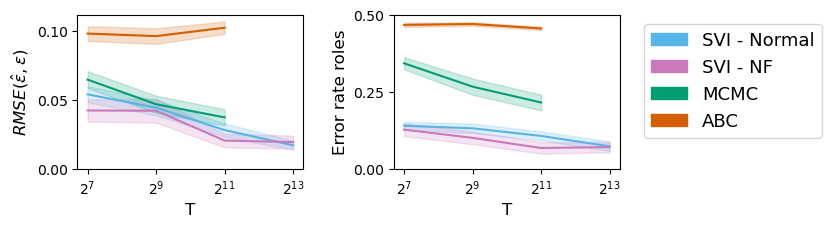

In [43]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (7,2))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0.4, hspace = 0.1)

x_lab_T = [128, 512, 2048, 8192]
x_labT_pow2 =  [r"$2^{7}$", r"$2^{9}$", r"$2^{11}$", r"$2^{13}$"]
# x_lab_N=[50, 100, 200, 400]
# x_lab_initial_leaders_ratio = [0.01, 0.02, 0.04, 0.1, 0.2]

x_var = "T"
for j, y_var in enumerate(["rmse_epsilon", "error_roles"]):
    sns.lineplot(data = df, x = x_var, y = y_var, hue = "method", ax = axes[j], errorbar = "se")
    axes[j].set_ylabel([r"$RMSE(\hat{\varepsilon}, \varepsilon)$", r"Error rate roles"][j], fontsize = 12)
    axes[j].set_xlabel(r"T", fontsize = 12)
    axes[j].set_xscale("log")

    axes[j].tick_params(axis = u'both', which = 'minor', length=0)
    axes[j].xaxis.set_minor_locator(plt.NullLocator())
    # axes[j].set_xlabel("")
    axes[j].set_xticks(x_lab_T, x_labT_pow2)
    axes[j].get_legend().remove()
    axes[j].set_yticks([[0,0.05,0.10], [0, 0.25,0.5]][j])
    axes[j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # if j == 2:
    #     axes[i,j].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
    # axes[0].set_ylabel([r"RMSE $(| \hat{\varepsilon}, \varepsilon)$", "Error rate roles"][j])
    # axes[j].set_ylabel("")
    
        
axes[1].legend(loc='upper center', bbox_to_anchor=(1.5, 1), fancybox=True, ncol=1, handles = patches_methods, fontsize = 13)
# fig.savefig(f"../paper/lineplot_extended_bottomlegend.pdf", bbox_inches="tight")

# axes[4,0].get_legend().remove()
# axes[0,0].legend(loc='upper center', bbox_to_anchor=(1.45, 1.8), fancybox=True, ncol=4, handles = patches_methods, fontsize = 13)
# fig.savefig(f"../paper/lineplot_extended_toplegend.pdf", bbox_inches="tight")

# axes[0,0].get_legend().remove()
# fig.savefig(f"../paper/lineplot_extended_nolegend.pdf", bbox_inches="tight")
fig.show()

In [44]:
df.query("(method == 'sviNF')&(N == 200)&(diff_epsilon_plus > 0)&(diff_epsilon_minus > 0)&(T > 511)").mean(numeric_only = True)["accuracy_roles"]

0.98299999833107